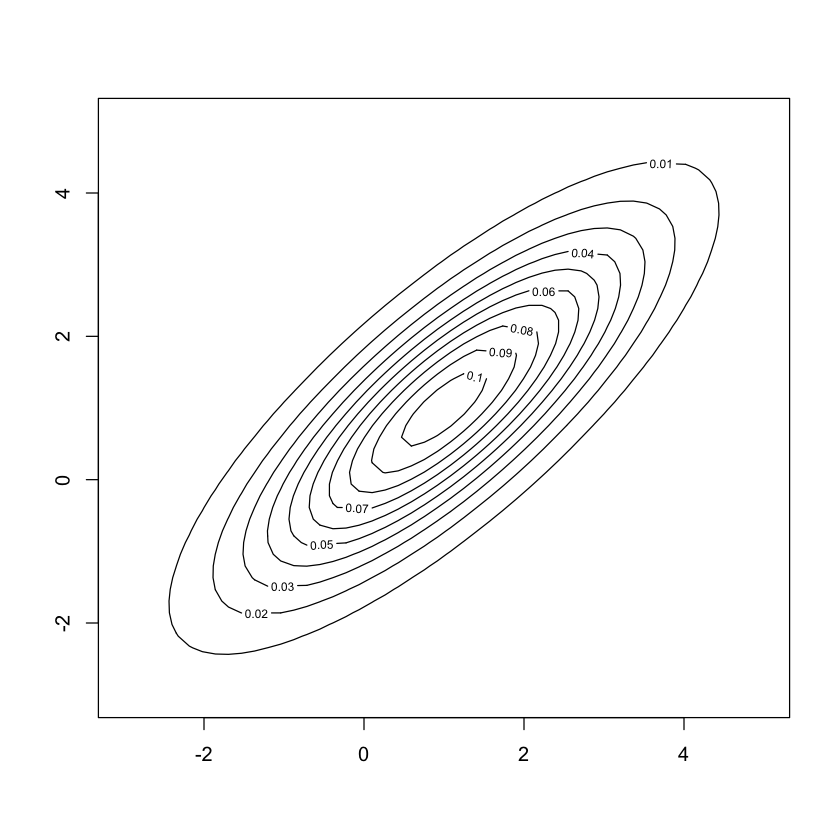

In [845]:
library(mvtnorm)
# 分散共分散行列の定義
sigma = matrix(c(2.5, 2, 2, 2.5), nrow=2, ncol=2 )
# 平均の定義
mu = c(1, 1)
x1 = seq(-3, 5, length = 50)
x2 = x1
f = function(x1, x2) {
    dmvnorm(matrix(c(x1, x2), ncol = 2), mean=mu, sigma=sigma)
}
z = outer(x1, x2, f)
# 元の分布をplotする
contour(x1,x2,z)

In [846]:
# 精度行列を求めておく
alpha = solve(sigma)
m1 = 0
m2 = 0

# m1, m2の計算
m1.update = function(m2) {
    return (mu[1] - alpha[1, 2]/alpha[1, 1] * (m2 - mu[2]))
}
m2.update = function(m1) {
    return (mu[2] - alpha[2, 1]/alpha[2, 2] * (m1 - mu[1]))
}

# q(z1)の更新式
q1 = function(x1, m1) {
    return (dnorm(x1, mean = m1, sd = sqrt(1/alpha[1, 1])))
}

# q(z2)の更新式
q2 = function(x2, m2) {
    return (dnorm(x2, mean = m2, sd = sqrt(1/alpha[2, 2])))
}

次のように更新の様子をオレンジで描画すると、確かに元の分布の平均に近づいていることがわかる

[1] 0.2
[1] 0.36
[1] 0.488
[1] 0.5904
[1] 0.67232
[1] 0.737856
[1] 0.7902848
[1] 0.8322278
[1] 0.8657823
[1] 0.8926258
[1] 0.9141007
[1] 0.9312805
[1] 0.9450244
[1] 0.9560195
[1] 0.9648156
[1] 0.9718525
[1] 0.977482
[1] 0.9819856
[1] 0.9855885
[1] 0.9884708


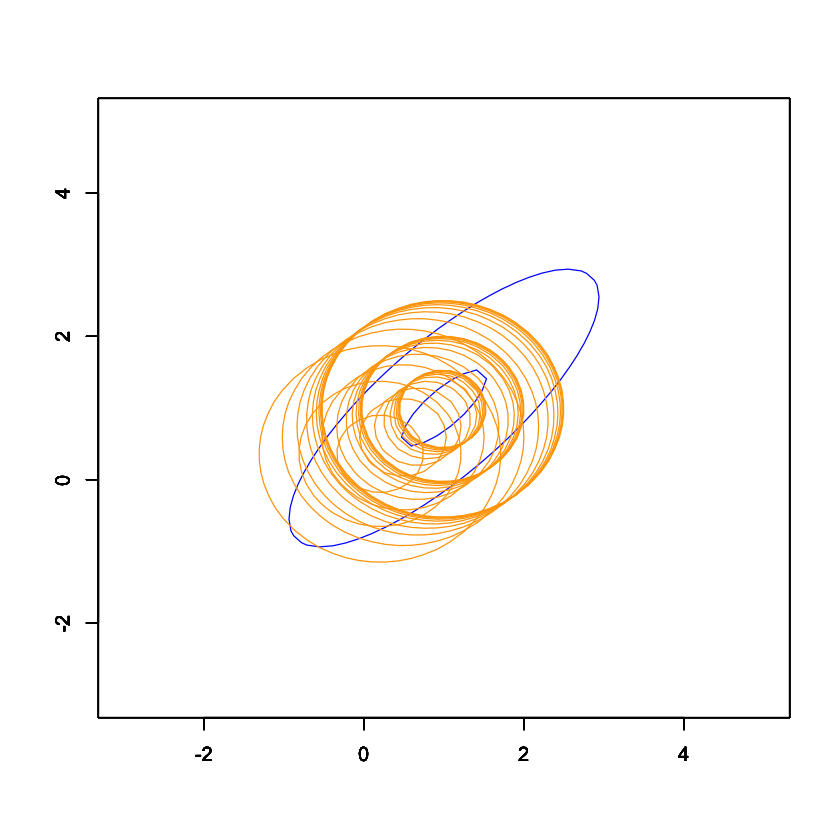

In [847]:
f1 = function(x1, x2) {
    q1(x1, m1) * q2(x2, m2)
}

contour(x1, x2, z,  drawlabels = FALSE, nlevels =3, col="blue")
par(new=TRUE)
for (i in 1:10) {
    m1 = m1.update(m2)
    m2 = m2.update(m1)
    z1 = outer(x1, x2, f1)
    contour(x1,x2,z1, drawlabels = FALSE, nlevels = 3, col="orange")
    if (i != 10) {
        par(new=TRUE)
    }
    # 更新されていくm1とm2を出力する
    print(m1)
    print(m2)
}